In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [9]:
#데이터 생성
np.random.seed(42)
height = np.random.normal(loc=170, scale=10, size=100)
weight = np.random.normal(loc=70, scale=5, size=100)
print(height)
print(weight)

#데이터 프레임 -> csv저장
data= pd.DataFrame({'Height' : height, 'Weight' : weight})
data.to_csv("./data/human_data.csv", index=False)

print(data)

[174.96714153 168.61735699 176.47688538 185.23029856 167.65846625
 167.65863043 185.79212816 177.67434729 165.30525614 175.42560044
 165.36582307 165.34270246 172.41962272 150.86719755 152.75082167
 164.37712471 159.8716888  173.14247333 160.91975924 155.87696299
 184.65648769 167.742237   170.67528205 155.75251814 164.55617275
 171.1092259  158.49006423 173.75698018 163.9936131  167.0830625
 163.98293388 188.52278185 169.86502775 159.42289071 178.22544912
 157.7915635  172.08863595 150.40329876 156.71813951 171.96861236
 177.3846658  171.71368281 168.84351718 166.98896304 155.2147801
 162.80155792 165.39361229 180.57122226 173.4361829  152.36959845
 173.24083969 166.1491772  163.23078    176.11676289 180.30999522
 179.31280119 161.60782477 166.90787624 173.31263431 179.75545127
 165.20825762 168.14341023 158.93665026 158.03793376 178.12525822
 183.56240029 169.27989878 180.03532898 173.61636025 163.54880245
 173.61395606 185.38036566 169.64173961 185.64643656 143.80254896
 178.2190250

In [10]:
#생성한 CSV파일을 불러와서 데이터 분포 시각화
#CSV 파일 읽기

data = pd.read_csv('./data/human_data.csv')

#키랑 체중 데이터 추출
height_data = data['Height']
weight_data = data['Weight']

print(weight_data)

0     62.923146
1     67.896773
2     68.286427
3     65.988614
4     69.193571
        ...    
95    71.926587
96    65.580713
97    70.768626
98    70.291044
99    64.285149
Name: Weight, Length: 100, dtype: float64


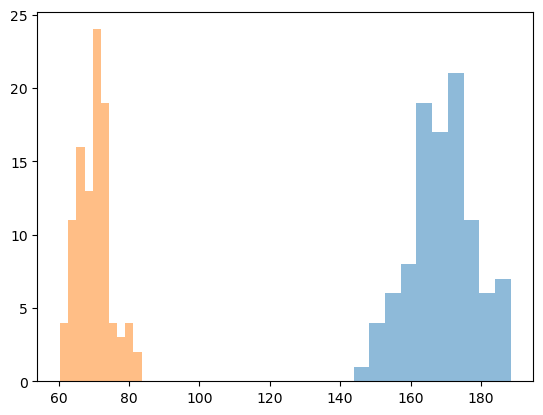

In [13]:
#데이터 분포 시각화
plt.hist(height, bins=10, alpha=0.5, label='Height')
plt.hist(weight, bins=10, alpha=0.5, label='weight')
plt.show()

In [15]:
#키에 대해서 정규분포 모델링
height_mean, height_std = norm.fit(height_data)
height_x = np.linspace(height_data.min(), height_data.max(), 100)
height_y = norm.pdf(height_x, height_mean, height_std)

print(height_x, height_y)

#체중에 대해서 정규분포 모델링
weight_mean, weight_std = norm.fit(weight_data)
weight_x = np.linspace(weight_data.min(), weight_data.max(), 100)
weight_y = norm.pdf(weight_x, weight_mean, weight_std)

print(weight_x, weight_y)

[143.80254896 144.25426848 144.70598801 145.15770753 145.60942706
 146.06114658 146.5128661  146.96458563 147.41630515 147.86802468
 148.3197442  148.77146372 149.22318325 149.67490277 150.1266223
 150.57834182 151.03006134 151.48178087 151.93350039 152.38521992
 152.83693944 153.28865897 153.74037849 154.19209801 154.64381754
 155.09553706 155.54725659 155.99897611 156.45069563 156.90241516
 157.35413468 157.80585421 158.25757373 158.70929325 159.16101278
 159.6127323  160.06445183 160.51617135 160.96789087 161.4196104
 161.87132992 162.32304945 162.77476897 163.2264885  163.67820802
 164.12992754 164.58164707 165.03336659 165.48508612 165.93680564
 166.38852516 166.84024469 167.29196421 167.74368374 168.19540326
 168.64712278 169.09884231 169.55056183 170.00228136 170.45400088
 170.90572041 171.35743993 171.80915945 172.26087898 172.7125985
 173.16431803 173.61603755 174.06775707 174.5194766  174.97119612
 175.42291565 175.87463517 176.32635469 176.77807422 177.22979374
 177.68151327

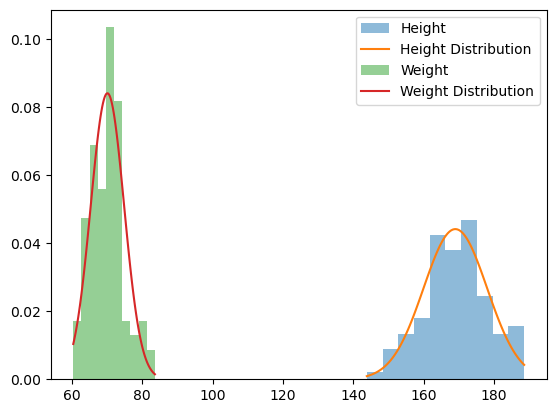

In [16]:
# 모델링 결과 시각화
plt.hist(height, bins=10, density=True, alpha=0.5, label='Height')
plt.plot(height_x, height_y, label='Height Distribution')
plt.hist(weight, bins=10, density=True, alpha=0.5, label='Weight')
plt.plot(weight_x, weight_y, label='Weight Distribution')
plt.legend(loc='upper right')
plt.show()